# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 2.  線性迴歸訓練資料、測試資料

80%  training data, 20%  testing data ==> 先利用此來驗證各種模型(演算法)的好壞及調好到最佳參數
之後可以利用由這個80%的訓練資料所得的模型後,拿100%資料re-train模型以得到最佳模型 (此model會更佳fit data)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
#生成X,y資料集後
x = np.linspace(0, 5, 50)

#Y資料我先預設生成一個斜率1.2 - 截距0.8
y = 1.2*x + 0.8 + 0.6*np.random.randn(50)


#再切分資料集 - train、test - random_state = 固定被打亂的資料集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)
print(x_train)


[4.08163265 1.73469388 1.83673469 0.         2.75510204 3.36734694
 3.67346939 4.28571429 1.02040816 0.30612245 4.18367347 1.32653061
 4.69387755 0.20408163 3.87755102 3.97959184 0.51020408 4.3877551
 3.7755102  3.06122449 0.6122449  2.95918367 1.63265306 1.93877551
 5.         4.48979592 2.14285714 3.26530612 3.46938776 0.71428571
 2.24489796 1.12244898 2.04081633 0.91836735 4.89795918 2.85714286
 3.16326531 1.53061224 2.65306122 3.57142857]


In [9]:
y

array([1.54846706, 0.34687309, 0.37951443, 1.10300812, 0.72652378,
       0.664425  , 1.13839168, 1.19148206, 2.40348702, 1.77851791,
       1.76073071, 2.03847725, 2.18717126, 2.19507929, 1.74943449,
       2.44711906, 2.41329985, 4.01344991, 2.5431732 , 3.62529199,
       2.98091115, 2.66715278, 3.31743577, 3.74860575, 3.59979561,
       4.24218964, 4.27781544, 4.5088611 , 3.89111852, 4.0203383 ,
       4.72756825, 4.76202454, 5.79255672, 5.3590769 , 5.33729965,
       4.59485809, 4.27247043, 5.94491177, 5.23647973, 6.13262304,
       5.19222792, 6.04518097, 6.54011681, 5.5669958 , 6.02267656,
       6.38162925, 6.35851828, 5.72470028, 6.59403874, 7.42229747])

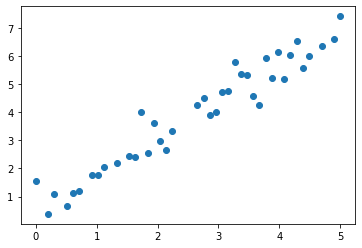

In [10]:
plt.scatter(x_train, y_train)

#### 用訓練資料來 fit 函數

記得現在我們只用 80% 的資料去訓練。

In [11]:
#先呼叫線性函數
regr = LinearRegression()

#轉成2維
X_train = x_train.reshape(-1,1)

#把Xtrain和Ytrain丟給機器學習
regr.fit(X_train,y_train)

#算出截距和斜率
print('Coefficients: ', regr.coef_)
print('interception: ', regr.intercept_)

Coefficients:  [1.27256322]
interception:  0.5923954453878921


In [12]:
#用Xtrain出來的數字，找出新的預測值 - 給他Ytrain
Y_train = regr.predict(X_train)


In [13]:
#來看看目前這個模型好不好 = MSE狀況
mse = np.sum((Y_train-y_train)**2) / len(y_train)
print(mse)

0.23599911848412267


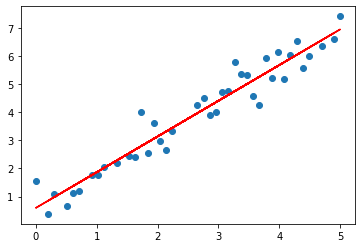

In [14]:
#把原始的圖和新預測的圖畫出來比較
plt.scatter(x_train, y_train) #原始
plt.plot(x_train, Y_train, 'r') #預測

#### test with test data

In [15]:
#上面已經用Train的資料看完預測狀況，現在拿全新資料，TEST資料進去模型裡面看狀況
X_test = x_test.reshape(-1,1)  #記得也要轉2維
Y_test = regr.predict(X_test)  #把Xtest丟進模型，生成新的預測值Ytest

print(Y_test)

[2.15063612 2.4103429  1.111809   1.63122256 6.43579799 0.72224884
 3.83873019 3.7088768  6.69550477 3.57902341]


$$\widehat{y}=xw+b=w_{1}x_{1}+b$$

In [16]:
#Y=WX+b

#另外一種求值方式 - 把斜率、截距算出來，再把Xtest丟進去
W=regr.coef_
b=regr.intercept_
W*X_test+b


array([[2.15063612],
       [2.4103429 ],
       [1.111809  ],
       [1.63122256],
       [6.43579799],
       [0.72224884],
       [3.83873019],
       [3.7088768 ],
       [6.69550477],
       [3.57902341]])

In [17]:
#可以來看全新的資料 - XTEST在模型表現的狀況

#"""此為最終大家要找的數字"""

mse = np.sum((Y_test-y_test)**2) / len(y_test)
print(mse)

0.24727108125749436


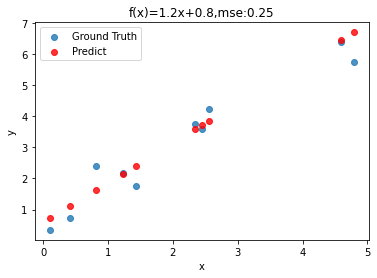

In [18]:
#畫完整圖示 - MSE越小越好
title='f(x)=1.2x+0.8'+',mse:'+str(round(mse,2))
plt.title(title)
plt.xlabel('x')
plt.ylabel('y')
#plt.grid(True)

#藍色代表的是實際資料
plt.scatter(x_test, y_test,alpha=0.8,label='Ground Truth')

#紅色代表的是預測出來的資料
plt.scatter(x_test, Y_test, c='r', alpha=0.8,label='Predict')
plt.legend()